In [264]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import numpy as np
import pandas as pd

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns 
sns.set_style('white')
%config InlineBackend.figure_format = 'svg' 

%matplotlib inline

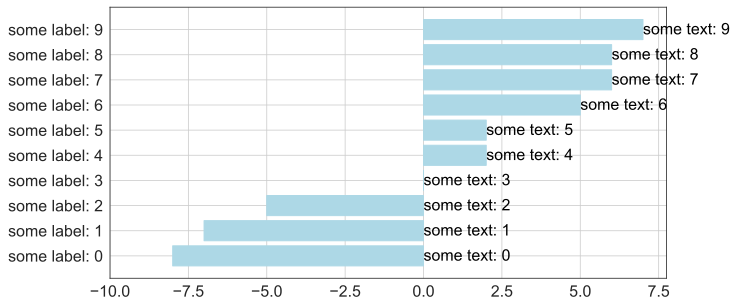

In [265]:
#Task1

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (10, 5)

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    plt.figure(figsize=figsize)
    ind = np.arange(bars_length.size)
    width = 0.8
    p1 = plt.barh(ind, bars_length, width, color='lightblue', edgecolor='lightblue', tick_label=ind)
    
    plt.xticks(np.arange(-10, 10, 2.5))
    plt.yticks(ind, yticks_labels) 
        
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    
    for i in range (bars_length.size):
        (ax.text(bars_length[i], i-0.19, labels[i], color='black', size=16)) if (bars_length[i]>0) else (ax.text(0, i-0.19, labels[i], color='black', size=16)) 
    
    plt.grid(True)
    plt.show()
    
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)


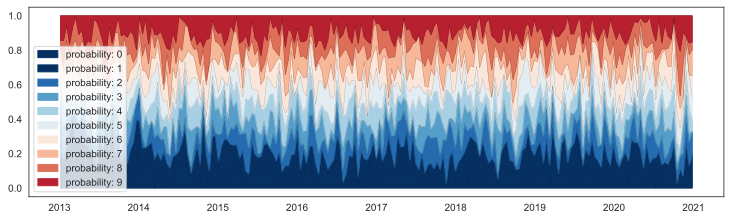

In [277]:
def plot_time_probabilities(probabilities_in_time, figsize):
    pb = probabilities_in_time
    vsize = (int)(pb.size / pb.index.size)
    
    plt.figure(figsize=figsize)
    plt.plot(pb[0], lw=0.1, c='black')
    
    colors = cm.get_cmap('RdBu', vsize)
    col_num=1.0
    
    plt.fill_between(pb.index, pb[0], color=colors(col_num))
    patches = [i for i in range (vsize)]
    patches[0] = mp.Patch(color=colors(col_num), label='probability: 0')
    below = pb[0]
    
    for i in range (vsize-1):
        plt.plot(below + pb[i+1], lw=0.1, c='black')
        col_num -= 1/vsize
        plt.fill_between(pb.index, below, below+pb[i+1], color=colors(col_num))
        below += pb[i+1]
        patches[i+1] = mp.Patch(color=colors(col_num), label='probability: {}'.format(i+1))
        
    plt.legend(handles=[patches[i] for i in range (vsize)], loc='lower left')
    plt.show()


dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (12.5, 3.5)

plot_time_probabilities(probabilities_in_time, figsize)

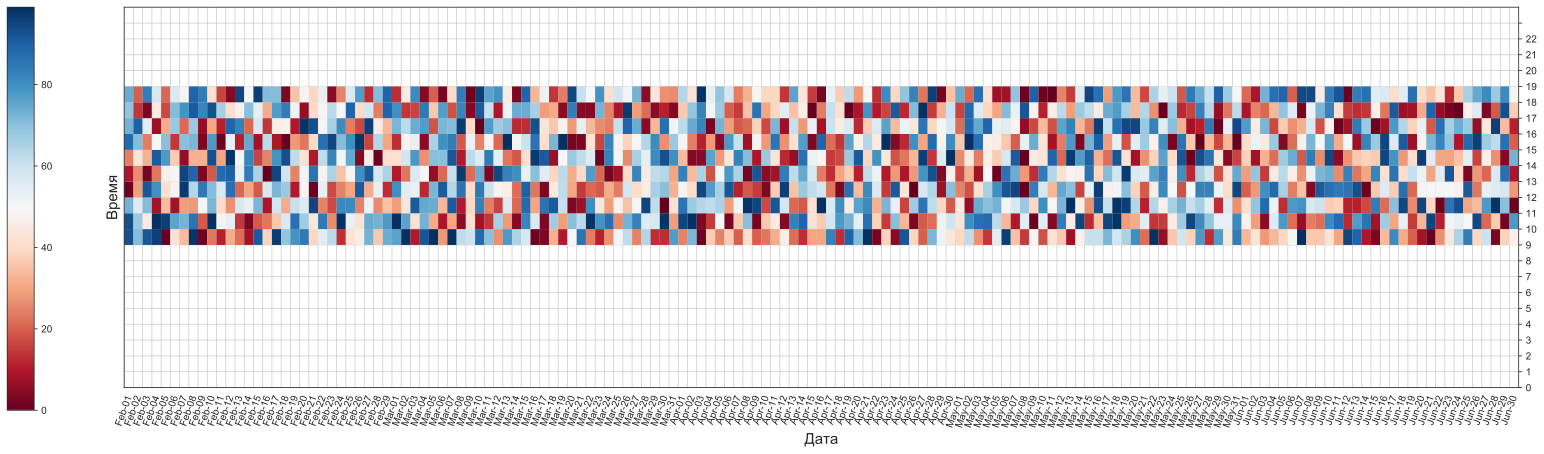

In [470]:
#Task3

def plot_intraday_ts(intraday_ts, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    
    d = (ts.index[ts.index.size-1] - ts.index[0]).days
    Z = np.zeros((24, d))
    counter = 0
    for j in range (d):
        for i in range (24):
            Z[i,j] = ts.values[j+i+counter]
        counter += 23
    cs = plt.pcolor(Z, cmap='RdBu') 

    bax = fig.add_axes([0.06, 0.08, 0.015, 0.8]) 
    fig.colorbar(cs, cax = bax) 
    
    x_ticks = [ts.index[24*i].strftime("%b-%d") for i in range (d)]
    ax.set_xticks(np.arange(d))
    ax.set_xticklabels(x_ticks, rotation=70)
    y_ticks = np.arange(0, 23, step=1)
    ax.set_yticks(np.arange(24))
    ax.yaxis.tick_right()
    ax.set_yticklabels(y_ticks)
    ax.set_xlabel('Дата', fontsize = 15)
    ax.set_ylabel('Время', fontsize = 15)
    
    ax.grid(True)

    plt.show()
            
    
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)
ts = intraday_ts


plot_intraday_ts(intraday_ts, figsize)